<a href="https://colab.research.google.com/github/BuberDev/Machine_Learning/blob/main/Klasyfikator_wieloklasowy_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import plotly.express as px
import plotly.subplots as make_subplots
import plotly.graph_objects as go



In [2]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)


In [3]:
print(tf.__version__)

2.12.0


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape:', X_train.shape)
print(f'y_train shape:',y_train.shape)
print(f'X_test shape:', X_test.shape)
print(f'y_test shape', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape (10000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [7]:
X_train = X_train / 255
X_test = X_test / 255

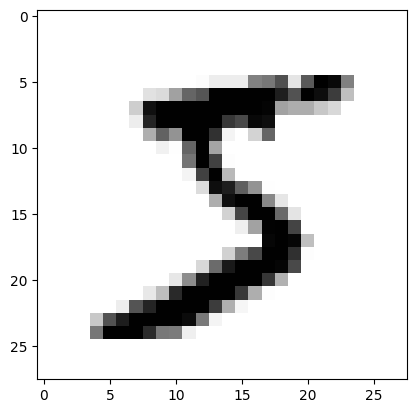

In [8]:
plt.imshow(X_train[0], cmap="gray_r")

(-0.5, 27.5, 27.5, -0.5)

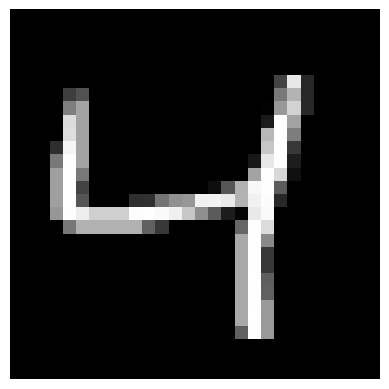

In [9]:
plt.imshow(X_train[2], cmap="gray")
plt.axis("off")

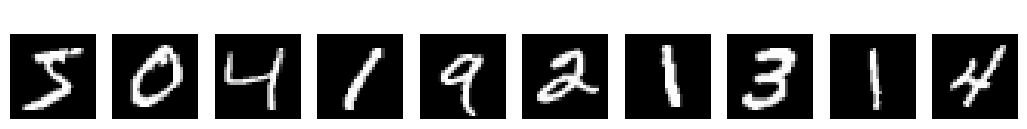

In [10]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis("off")
  plt.imshow(X_train[i-1], cmap="gray")
  plt.title(y_train[i-1], color="white", fontsize=16)
plt.show()

In [11]:
#Budowa sieci neuronowej
def build_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(units=128, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(units=10, activation="softmax"))

  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Trenowanie modelu

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 10s 3ms/step - loss: 0.3267 - accuracy: 0.9059 - val_loss: 0.1623 - val_accuracy: 0.9542
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1549 - accuracy: 0.9530 - val_loss: 0.1204 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1160 - accuracy: 0.9646 - val_loss: 0.0974 - val_accuracy: 0.9723
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0950 - accuracy: 0.9708 - val_loss: 0.0924 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.0836 - val_accuracy: 0.9759
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.0790 - val_accuracy

# Model Checkpoint

In [13]:
!ls
!ls -l

sample_data
total 4
drwxr-xr-x 1 root root 4096 Jun 14 18:27 sample_data


In [14]:
!pwd

/content


In [15]:
!mkdir model

In [18]:
# Zapisywanie wag po kazdej poprawie modelu
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = 'model/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [17]:
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1486/1500 [============================>.] - ETA: 0s - loss: 0.3281 - accuracy: 0.9045
Epoch 1: val_accuracy improved from -inf to 0.95542, saving model to model/weights-01-0.9554.hdf5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3274 - accuracy: 0.9047 - val_loss: 0.1559 - val_accuracy: 0.9554
Epoch 2/10
1493/1500 [============================>.] - ETA: 0s - loss: 0.1569 - accuracy: 0.9543
Epoch 2: val_accuracy improved from 0.95542 to 0.96492, saving model to model/weights-02-0.9649.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1570 - accuracy: 0.9542 - val_loss: 0.1152 - val_accuracy: 0.9649
Epoch 3/10
1483/1500 [============================>.] - ETA: 0s - loss: 0.1193 - accuracy: 0.9638
Epoch 3: val_accuracy improved from 0.96492 to 0.97050, saving model to model/weights-03-0.9705.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1194 - accuracy: 0.9637 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 4

In [20]:
# Zapisanie najlepszego modelu

filepath = "best_model_weights.hdf5"
checkpoint= ModelCheckpoint(filepath=filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1488/1500 [============================>.] - ETA: 0s - loss: 0.3299 - accuracy: 0.9040
Epoch 1: val_accuracy improved from -inf to 0.95500, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3287 - accuracy: 0.9044 - val_loss: 0.1572 - val_accuracy: 0.9550
Epoch 2/10
1499/1500 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9520
Epoch 2: val_accuracy improved from 0.95500 to 0.96258, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1605 - accuracy: 0.9520 - val_loss: 0.1228 - val_accuracy: 0.9626
Epoch 3/10
1483/1500 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9633
Epoch 3: val_accuracy improved from 0.96258 to 0.97058, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9632 - val_loss: 0.0998 - val_accuracy: 0.9706
Epoch 4/10
1489/1500 [

In [25]:
# Zaladowanie wag i ocena modelu
best_model = Sequential()
best_model.add(Flatten(input_shape=(28,28)))
best_model.add(Dense(units=128, activation="relu"))
best_model.add(Dropout(0.2))
best_model.add(Dense(units=10, activation="softmax"))


best_model.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

best_model.load_weights("best_model_weights.hdf5")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy)

0.9796000123023987


# Early stopping

In [26]:
model = build_model()
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)


Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3190 - accuracy: 0.9082 - val_loss: 0.1549 - val_accuracy: 0.9562
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1580 - accuracy: 0.9531 - val_loss: 0.1149 - val_accuracy: 0.9675
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1164 - accuracy: 0.9663 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9701 - val_loss: 0.0888 - val_accuracy: 0.9742
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.0822 - val_accuracy: 0.9766
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.0816 - val_accuracy:

In [27]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.318997,0.908188,0.154934,0.956167
1,0.158049,0.953146,0.114943,0.967500
2,0.116441,0.966292,0.100334,0.970250
3,0.097342,0.970083,0.088800,0.974167
4,0.079574,0.975708,0.082187,0.976583


!pip install plotly


In [33]:
from plotly.subplots import make_subplots

In [35]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name="loss"), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['val_loss'], name="val_loss"), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name="accuracy"), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics["val_accuracy"], name="val_accuracy"),row=2, col=1)

fig.update_layout(width=800)